In [110]:
import requests
from dotenv import load_dotenv
import numpy as np
import os 
import csv
from pathlib import Path
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
# Use Pandas to read the following CSV files into DataFrames. Be sure to convert the dates to a DateTimeIndex.
# whale_returns.csv: Contains returns of some famous "whale" investors' portfolios.
csvpath = Path('./Starter_Code/Resources/whale_returns.csv')
# Whale_data = pd.read_csv(csvpath, index_col='Date')
Whale_data = pd.read_csv(csvpath)
# Whale_data =pd.DateTimeIndex('Date',inplace = True )
Whale_data = Whale_data.set_index(pd.DatetimeIndex(Whale_data['Date']))
Whale_data.drop(['Date'], axis=1, inplace= True)
Whale_data.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [57]:
Whale_data.dropna(inplace = True)
Whale_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [58]:
# algo_returns.csv: Contains returns from the in-house trading algorithms from your company.
csvpath = Path('./Starter_Code/Resources/algo_returns.csv')
Algo_data = pd.read_csv(csvpath)
Algo_data = Algo_data.set_index(pd.DatetimeIndex(Algo_data['Date']))
Algo_data.drop(['Date'], axis=1, inplace= True)
Algo_data


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [59]:
Algo_data.tail()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


In [60]:
# sp500_history.csv: Contains historical closing prices of the S&P 500 Index.
csvpath = Path('./Starter_Code/Resources/sp500_history.csv')
sp500_data = pd.read_csv(csvpath)
sp500_data = sp500_data.set_index(pd.DatetimeIndex(sp500_data['Date']))
sp500_data.drop(['Date'], axis=1, inplace= True)
sp500_data.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


### 2. Identify and remove null values.

In [61]:
Whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [62]:
sp500_data.isnull().sum()

Close    0
dtype: int64

In [63]:
Algo_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [64]:
Algo_data.dropna()



,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [65]:
Algo_data.tail()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


In [66]:
Whale_data.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [67]:
Whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


### 3.Remove any non-numeric values (e.g., dollar signs) from the DataFrames and convert the data types as needed.

In [68]:
#DONT WORK--------------------------------------------------
#sp500_data.columns = sp500_data.columns.str.replace('[#@$&]', '')
#Whale_data['ClosingPrice']= Whale_data['Close'].str.replace('[#@$&]','')
#----------------------------------------------------------

# Runs but doesnt remove $-------------------------------------
# sp500_data.columns = sp500_data.columns.str.replace('$','', regex=True)
#--------------------------------------------------------------


sp500_data["Close"] = sp500_data["Close"].str.replace("$","").astype(float)
sp500_data.head()
#UNSURE why this throws error but it works so eh ok for now.

C:\Users\danie\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # This is added back by InteractiveShellApp.init_path()


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


### 4.The whale portfolios and algorithmic portfolio CSV files contain daily returns, but the S&P 500 CSV file contains closing prices.
### Convert the S&P 500 closing prices to daily returns.


In [69]:
sp500_data.pct_change()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [70]:
sp500_data.rename(columns = {'Close':'S&P500'}, inplace = True)
sp500_data

,S&P500
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


### 5. Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

In [98]:
# maxrows = 500

Merge_Portfolio = pd.concat([sp500_data, Algo_data, Whale_data] ,axis="columns", join="inner")
Merge_Portfolio

,S&P500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-23,2933.68,0.004969,0.009622,0.007167,0.003485,0.006472,0.013278
2019-04-22,2907.97,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-18,2905.03,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916
2019-04-17,2900.45,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-16,2907.06,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
...,...,...,...,...,...,...,...
2015-03-09,2079.43,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
2015-03-06,2071.26,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-05,2101.04,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726


In [99]:
Merge_Portfolio.isnull().sum()

S&P500                         0
Algo 1                         0
Algo 2                         0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [100]:
Merge_Portfolio.dropna(inplace= True)
Merge_Portfolio

,S&P500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-23,2933.68,0.004969,0.009622,0.007167,0.003485,0.006472,0.013278
2019-04-22,2907.97,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-18,2905.03,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916
2019-04-17,2900.45,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-16,2907.06,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
...,...,...,...,...,...,...,...
2015-03-09,2079.43,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
2015-03-06,2071.26,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-05,2101.04,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726


In [101]:
Merge_Portfolio.isnull().sum()

S&P500                         0
Algo 1                         0
Algo 2                         0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [125]:
Merge_Portfolio.fillna(0)
Merge_Portfolio

,S&P500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-23,2933.68,0.004969,0.009622,0.007167,0.003485,0.006472,0.013278
2019-04-22,2907.97,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-18,2905.03,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916
2019-04-17,2900.45,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-16,2907.06,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
...,...,...,...,...,...,...,...
2015-03-09,2079.43,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
2015-03-06,2071.26,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-05,2101.04,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726


# Perform Quantitative Analysis


### Analyze the data to determine if any of the portfolios outperform the stock market (that is, the S&P 500). 
### Specifically, you will do a performance analysis and a risk analysis, and then calculate rolling statistics and Sharpe ratios.

In [126]:
# 1.Calculate and plot daily returns of all portfolios.
MergePortfolio_DailyReturns= Merge_Portfolio.pct_change()
MergePortfolio_DailyReturns.dropna(inplace = True)
MergePortfolio_DailyReturns

,S&P500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-22,-0.008764,-0.863857,-1.201184,-1.360764,-3.104305,-1.562478,-1.081925
2019-04-18,-0.001011,-1.868976,-0.364991,-1.559965,-1.166626,-1.159757,-2.761467
2019-04-17,-0.001577,16.521245,3.253330,-3.000629,-6.293097,-8.582317,0.681647
2019-04-16,0.002279,-0.325825,-1.554579,-1.931873,-1.060020,-0.811553,-0.740329
2019-04-15,-0.000509,-0.376322,-2.576745,-1.526776,-3.978912,-1.478853,-13.540137
...,...,...,...,...,...,...,...
2015-03-09,0.017254,2.914261,-1.107214,-1.056736,-1.791168,-1.483704,-0.830326
2015-03-06,-0.003929,-0.090014,-9.793844,-14.576565,-1.845843,-2.451576,6.926424
2015-03-05,0.014378,-0.807323,-1.377228,-1.508010,-2.140463,-1.277633,-1.513536


<AxesSubplot:xlabel='Date'>

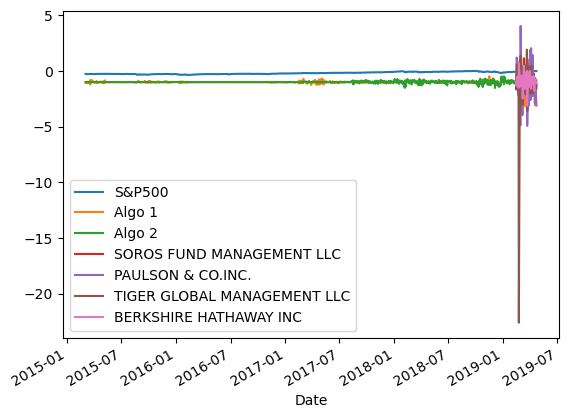

In [144]:
# 2.Calculate and plot cumulative returns for all portfolios. Does any portfolio outperform the S&P 500?
MergePortfolio_CumulativeReturns = (1 + MergePortfolio_DailyReturns).cumprod() -1
MergePortfolio_CumulativeReturns.plot()

<AxesSubplot:xlabel='Date'>

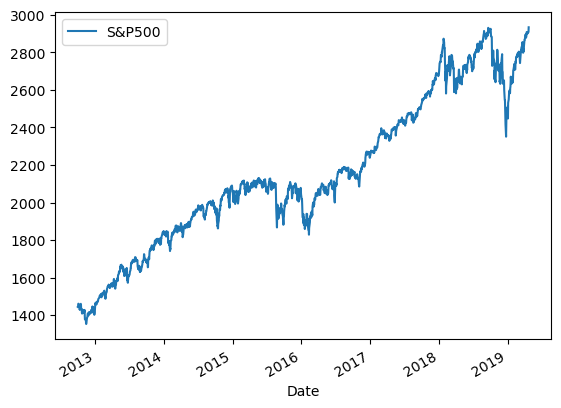

In [128]:
sp500_data.plot()

<AxesSubplot:xlabel='Date'>

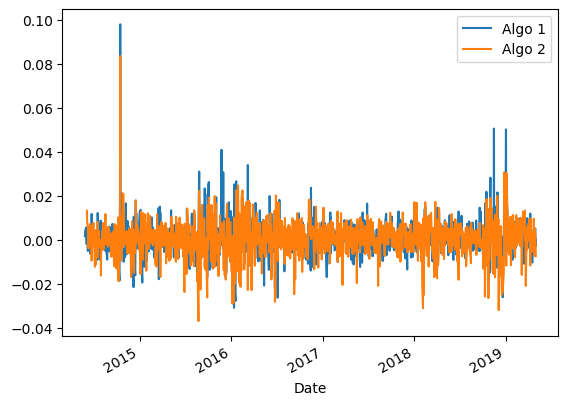

In [129]:
Algo_data.plot() 
# This looks terrible I need to revisit formatting 

<AxesSubplot:xlabel='Date'>

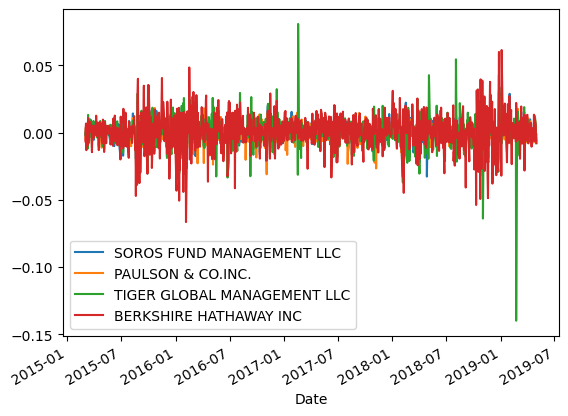

In [130]:
Whale_data.plot()
# This looks terrible I need to revisit formatting 

### Risk Analysis

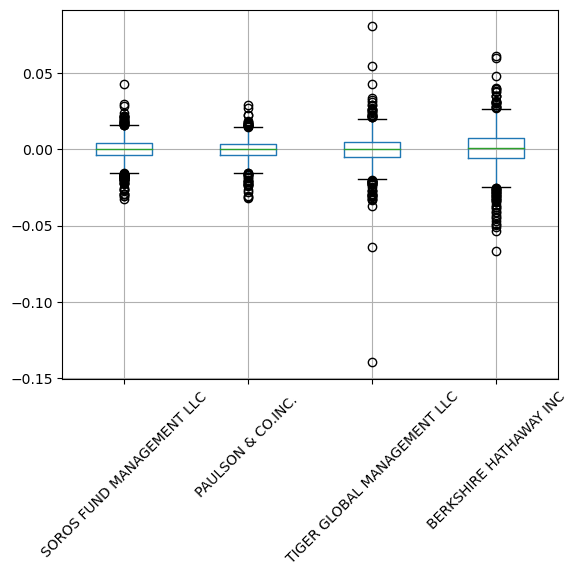

In [131]:
# 1.Create a box plot for each of the returns.
WhaleBox = Whale_data.boxplot(rot =45)


#,column=['S&P500','PAULSON & CO.INC.', 'Algo 1', 'Algo 2','SOROS FUND MANAGEMENT LLC','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC']

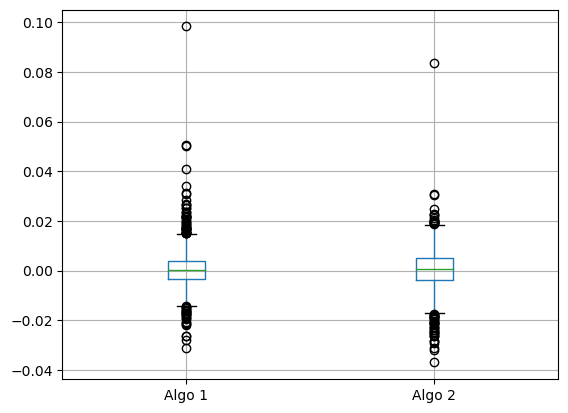

In [132]:
AlgoBox = Algo_data.boxplot()

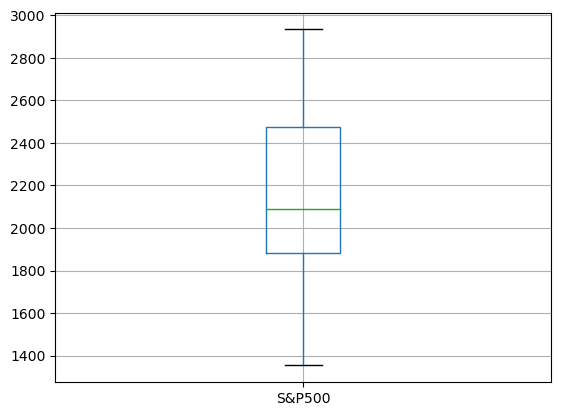

In [133]:
SP500Box = sp500_data.boxplot()

In [134]:
# 2.Calculate the standard deviation for each portfolio.
print(sp500_data.std())

S&P500    402.122004
dtype: float64


In [135]:
print(Algo_data.std())

Algo 1    0.007972
Algo 2    0.008466
dtype: float64


In [136]:
print(Whale_data.std())

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64


In [26]:
# 3.Determine which portfolios are riskier than the S&P 500.
## Based on Std they all appear to be less risky but their returns also appear to be lower. 

In [27]:
# 4.Calculate the annualized standard deviation.


### Rolling Statistics

<AxesSubplot:xlabel='Date'>

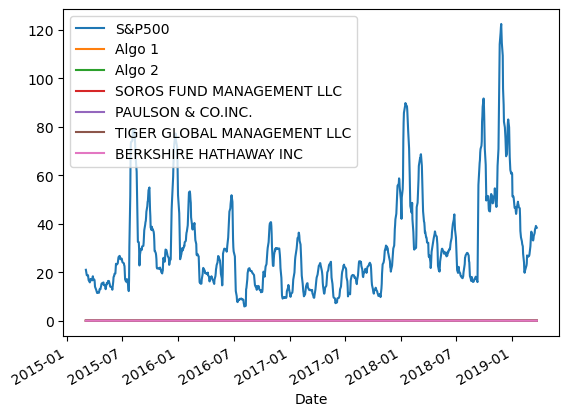

In [116]:
#1.Calculate and plot the rolling standard deviation for all portfolios, using a 21-day window.
Merge_RollingSTD = Merge_Portfolio.rolling(21).std()
Merge_RollingSTD.plot()

In [29]:
#2.Calculate and plot the correlation between each stock to determine which portfolios mimics the S&P 500.
Correlation = np.corrcoef(x, y)

In [138]:
#3.Choose one portfolio, then calculate and plot the 60-day rolling beta between that portfolio and the S&P 500.
Berkshire = Whale_data['BERKSHIRE HATHAWAY INC']
Berkshire


Date
2015-03-02         NaN
2015-03-03   -0.006569
2015-03-04    0.004213
2015-03-05    0.006726
2015-03-06   -0.013098
                ...   
2019-04-25    0.004848
2019-04-26    0.010434
2019-04-29    0.005223
2019-04-30   -0.003702
2019-05-01   -0.007833
Name: BERKSHIRE HATHAWAY INC, Length: 1060, dtype: float64

In [145]:
# Merge_Portfolio['beta'] = pd.rolling_cov(Merge_Portfolio['BERKSHIRE HATHAWAY INC'], Merge_Portfolio['S&P500'], window=60) / pd.rolling_var(Merge_Portfolio['S&P500'], window=60)


### Rolling Statistics Challenge: Exponentially Weighted Average

In [ ]:
# An alternative method to calculate a rolling window is to find the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm Links to an external site.with a 21-day half-life.


### Sharpe Ratios

In [31]:
# 1.Using the daily returns, calculate the Sharpe ratios and visualize them in a bar plot.


In [32]:
# 2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.


# Create a Custom Portfolio

In [152]:
# 1. Use Google Sheets Links to an external site.and its built-in GOOGLEFINANCE function to choose 3–5 stocks for your portfolio.
Stonk_Path = Path('./Stonk_Data.csv')
# Whale_data = pd.read_csv(csvpath, index_col='Date')
Stonks = pd.read_csv(Stonk_Path)
Stonks = Stonks.set_index(pd.DatetimeIndex(Stonks['Date']))
Stonks.drop(['Date'], axis=1, inplace= True)
Stonks.head()

,JCI,BCRX,CCJ,ALB
Date,,,,
2023-01-25,68.10,10.79,27.34,270.98
2023-01-24,68.06,11.01,26.96,264.59
2023-01-23,66.73,10.63,26.87,260.64
2023-01-20,66.05,10.40,26.30,248.49
2023-01-19,64.83,10.01,25.32,239.11


In [154]:
# 2. Download the data as CSV files and calculate the portfolio returns.
MyStonkReturns= Stonks.pct_change()
MyStonkReturns

,JCI,BCRX,CCJ,ALB
Date,,,,
2023-01-25,NaN,NaN,NaN,NaN
2023-01-24,-0.000587,0.020389,-0.013899,-0.023581
2023-01-23,-0.019542,-0.034514,-0.003338,-0.014929
2023-01-20,-0.010190,-0.021637,-0.021213,-0.046616
2023-01-19,-0.018471,-0.037500,-0.037262,-0.037748
...,...,...,...,...
2017-01-09,-0.023160,0.024233,-0.092827,0.006676
2017-01-06,0.004460,0.124606,0.001860,0.003647
2017-01-05,-0.019864,-0.028050,0.014856,-0.004625


In [158]:
# 3. Calculate the weighted returns for your portfolio, assuming equal number of shares per stock
weights = [0.25,0.25,0.25,0.25]

MyStonkWeighted_returns = MyStonkReturns.dot(weights)
MyStonkWeighted_returns.head()

Date
2023-01-25         NaN
2023-01-24   -0.004420
2023-01-23   -0.018081
2023-01-20   -0.024914
2023-01-19   -0.032745
dtype: float64

<AxesSubplot:xlabel='Date'>

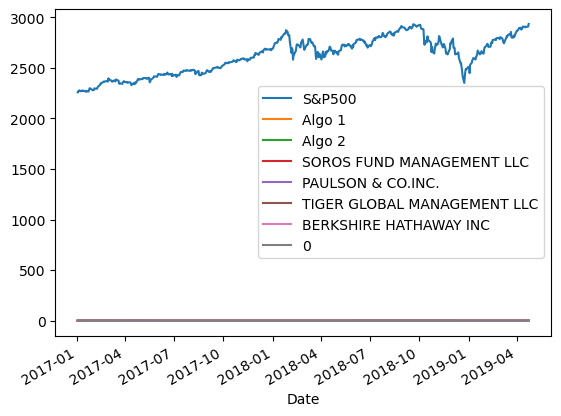

In [164]:
# 4. Add your portfolio returns to the DataFrame with the other portfolios.
MEGAMerge_Portfolio = pd.concat([Merge_Portfolio, MyStonkWeighted_returns] ,axis="columns", join="inner")
MEGAMerge_Portfolio.plot()

# 5. My Stonk Portfolio analyses:

In [165]:
# Calculate the annualized standard deviation.
Std_AllStonks = MEGAMerge_Portfolio.std() 
Std_AllStonks

    
    

S&P500                         182.335195
Algo 1                           0.006721
Algo 2                           0.007573
SOROS FUND MANAGEMENT LLC        0.007856
PAULSON & CO.INC.                0.006811
TIGER GLOBAL MANAGEMENT LLC      0.011875
BERKSHIRE HATHAWAY INC           0.012489
0                                0.015648
dtype: float64

<AxesSubplot:xlabel='Date'>

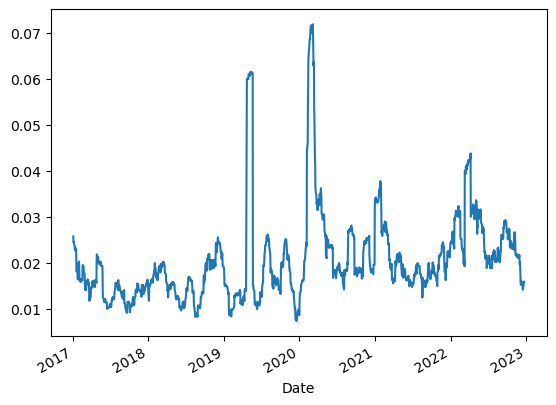

In [163]:
# Calculate and plot the rolling standard deviation with a 21-day window.
Stonk_RollingSTD = MyStonkWeighted_returns.rolling(21).std()
Stonk_RollingSTD.plot()

In [ ]:
    # Calculate and plot the correlation.


In [ ]:
    # Calculate and plot beta for your portfolio compared to the S&P 60 TSX.


In [ ]:
    # Calculate the Sharpe ratios and generate a bar plot.


In [ ]:
    # How does your portfolio perform?